In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

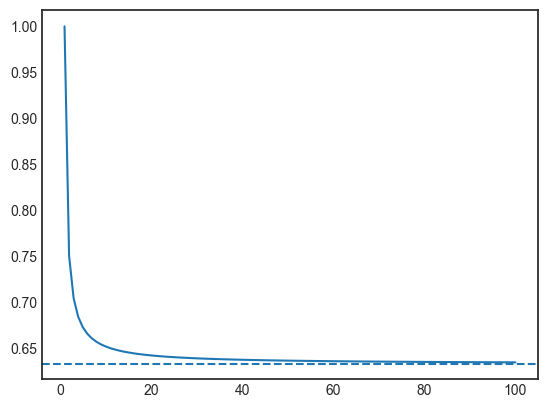

In [22]:
def j_not_prob(n):
    return (1 - ((n-1)/n)**n)

n = 100
ix = np.arange(1, n+1)
plt.plot(ix, j_not_prob(ix))
plt.gca().axhline(j_not_prob(500), ls='--')

We hypothize, that as n->inf, the prob of `j` being in the bootstrap sample stabalizes. </br>
lets see whether this is actually true

In [29]:
# 100 bootstrap samples
j = 4
for n in np.arange(100, 1000, step=100):
    count_j[n] = 0
    ix = np.arange(1, n)
    for k in range(n):
        ix_k = np.random.choice(ix, size=n)
        if j in ix_k: 
            count_j[n] += 1
    count_j[n] /= n
count_j

{100: 0.64,
 200: 0.56,
 300: 0.66,
 400: 0.645,
 500: 0.678,
 600: 0.635,
 700: 0.6571428571428571,
 800: 0.64,
 900: 0.6233333333333333}

In [33]:
res = np.array(list(count_j.values()))
res.mean(), res.std()

(0.6376084656084656, 0.0312946221828131)